In [1]:
# Re: figures, I think the current diverging color ramps are great, but if it would be possible to put the legends smaller and vertically on the side of each panel 
# (so that the transects are larger and more of the focus, as well as align with my other figures that have the legends/keys on the right side), that would be great!

# Also, the red and grey lines that mark where clay was observed in the field are really helpful, but if there could be another, 
# more high-contrast color that we could use in both panels, I think that would be more clear as well. I’ve been using a dark grey 
# (something like #888C8D) to indicate this clay layer in other figures, so maybe there’s a way to incorporate it here as well? 
# It might require the color ramps to be less dark, and I’m not sure if there are disciplinary conventions with the color ramps, etc., 
# so I’m open to other options as well!
                                                                                                                                                                                                                                                                 
# Otherwise, the general aesthetics of all my figures have been that the final product is 95mm high and 115 mm wide, 
# with 8 pt Arial font for all text/annotations, and bold font for axis and legend titles.

In [2]:
import numpy as np
import pygimli as pg
from pygimli.physics import ert
import pygimli.meshtools as mt
from pybert import tdip

import matplotlib.pyplot as plt
import matplotlib
import os
#import colorcet as cc
from cmcrameri import cm

In [3]:
filename='TANGLEWOOD1_Plattner4andDip_realElecs.txt'
name = 'newTopo-VeryVeryFineMeshRobustRemAllBad-Blocky'
#savename = os.path.join('inversionResults',name,'ERTIPManager','resistivity')
savename = os.path.join('inversionResults',name)

In [4]:
mgr = ert.ERTManager(filename,fd=False)
# Fix topo
elecs = mgr.data.sensors().array()
#print(elecs)
#help(mgr.data.setSensors())
new = np.loadtxt('ERT_survey_updated_nohead.csv', delimiter=',')
elecs[:,2] = new[:,1]
mgr.data.setSensors(elecs)

mgr.data['k'] = ert.geometricFactors(mgr.data)
mgr.data.estimateError(relativeError=0.02)

03/06/24 - 12:37:17 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
03/06/24 - 12:37:17 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns


In [5]:
ip = tdip.TDIPdata(filename)
ip.basename = savename
ip.loadResults(basename=savename)
ip.loadFit()
#mgr.setMesh(ip.pd)
cov = np.loadtxt(savename+'.cog')
#fullMesh = pg.Mesh(savename+'_pd.bms')
mesh = ip.pd.createSubMesh(ip.pd.findCellByMarker(2))

dict_keys(['Time', 'MeasID', 'DPID', 'Channel', 'A(x)', 'A(y)', 'A(z)', 'A(adr)', 'B(x)', 'B(y)', 'B(z)', 'B(adr)', 'M(x)', 'M(y)', 'M(z)', 'M(adr)', 'N(x)', 'N(y)', 'N(z)', 'N(adr)', 'F(x)', 'F(y)', 'F(z)', 'Note', 'I(mA)', 'Uout(V)', 'U(V)', 'SP(V)', 'R(Ohm)', 'Var(%)', 'Rho-a(Ohm-m)', 'Cycles', 'IP Delay Window(mV/V)', 'IP #1(mV/V)', 'IP #2(mV/V)', 'IP #3(mV/V)', 'IP #4(mV/V)', 'IP #5(mV/V)', 'IP #6(mV/V)', 'IP #7(mV/V)', 'IP #8(mV/V)', 'IP #9(mV/V)', 'IP #10(mV/V)', 'IP #11(mV/V)', 'IP #12(mV/V)', 'IP #13(mV/V)', 'IP #14(mV/V)', '', 'IP dV #1(mV)', 'IP dV #2(mV)', 'IP dV #3(mV)', 'IP dV #4(mV)', 'IP dV #5(mV)', 'IP dV #6(mV)', 'IP dV #7(mV)', 'IP dV #8(mV)', 'IP dV #9(mV)', 'IP dV #10(mV)', 'IP dV #11(mV)', 'IP dV #12(mV)', 'IP dV #13(mV)', 'IP dV #14(mV)', 'Pint(V)', 'Pext(V)', 'T int(deg C)', 'T log(deg C)', 'Latitude'])
1336 (14, 1336)


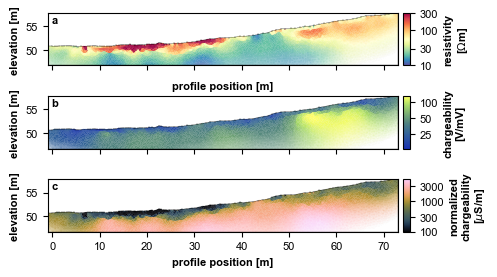

In [17]:
x = [54.5, 55.5]
#t1 = [242, 242]
#t2 = [241.5, 241.5]
offs = 188.096
t1 = [242-offs, 242-offs]
t2 = [241.5-offs, 241.5-offs]


# Altogether
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

matplotlib.rc('font', **font)

#matplotlib.rc('text', usetex=True)
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#fig = plt.figure(layout='constrained', figsize=(10, 4))

fig = plt.figure(figsize=(4.52756,3.74016))
subfigs = fig.subfigures(3, 1, hspace=-0.6)


ax = subfigs[0].subplots(1, 1, sharex=True)

a = pg.show(mesh, data=ip.res, coverage=cov, ax=ax, logScale=True, cMin=10, cMax=300, cMap=pg.utils.cMap('res'), colorBar=False, showBoundary=False)
a[0].plot(mgr.data.sensors().array()[:,0], mgr.data.sensors().array()[:,2],'|k', markersize=1, markeredgewidth=0.2)
#a[0].xaxis.tick_top()
a[0].set_ylabel('elevation [m]',weight='bold')
#a[0].xaxis.set_label_position('top')
a[0].xaxis.set_ticklabels([])
a[0].set_xlabel('profile position [m]',weight='bold')
b = mesh.boundaries(mesh.boundaryMarkers() != 0)
pg.viewer.mpl.drawSelectedMeshBoundaries(a[0], b,color=(0.0, 0.0, 0.0, 1.0),linewidth=0.2)


#a[0].plot(x,t1,'#888C8D',linewidth=0.4)
#a[0].plot(x,t2,'#888C8D',linewidth=0.4)
#a[0].plot(x,t1,'k',linewidth=0.5)
#a[0].plot(x,t2,'k',linewidth=0.5)

a[0].text(-0.2,243.8-offs,'a',weight='bold')

#### To do: Make surface line thin! 

mappable = a[0].collections[0]
fig = a[0].figure  
#[0.91, 0.408, 0.01, 0.173
#cbar_ax = fig.add_axes([0.91, 0.258, 0.015, 0.475])
cbar_ax = fig.add_axes([0.91, 0.3695, 0.015, 0.2515])
#cbar = fig.colorbar(mappable, cax=cbar_ax, ticks=[10,30,100,300], format='%g', label='resistivity [$\Omega$m]')
cbar = fig.colorbar(mappable, cax=cbar_ax, ticks=[10,30,100,300], format='%g')
cbar.set_label("resistivity"+"\n"+"[$\Omega$m]",weight='bold')

cbar.ax.minorticks_off()



ax = subfigs[1].subplots(1, 1, sharex=True)

a = pg.show(mesh, data=1000*ip.m0, coverage=cov, ax=ax, logScale=True, cMap=cm.imola, colorBar=False, showBoundary=False)

a[0].plot(mgr.data.sensors().array()[:,0], mgr.data.sensors().array()[:,2],'|k', markersize=1, markeredgewidth=0.2)
#a[0].xaxis.tick_top()
a[0].set_ylabel('elevation [m]',weight='bold')
#a[0].xaxis.set_label_position(None)
a[0].xaxis.set_ticklabels([])
#a[0].set_xlabel('profile position [m]',weight='bold')
b = mesh.boundaries(mesh.boundaryMarkers() != 0)
pg.viewer.mpl.drawSelectedMeshBoundaries(a[0], b,color=(0.0, 0.0, 0.0, 1.0),linewidth=0.2)

#a[0].plot(x,t1,'#888C8D',linewidth=0.4)
#a[0].plot(x,t2,'#888C8D',linewidth=0.4)
#a[0].plot(x,t1,'k',linewidth=0.5)
#a[0].plot(x,t2,'k',linewidth=0.5)

a[0].text(-0.2,243.8-offs,'b',weight='bold')


mappable = a[0].collections[0]
fig = a[0].figure  
cbar_ax = fig.add_axes([0.91, 0.3695, 0.015, 0.2515])
#cbar_ax = fig.add_axes([0.91, 0.383, 0.01, 0.225])
#cbar = fig.colorbar(mappable, cax=cbar_ax, ticks=[10,30,100,300], format='%g', label='resistivity [$\Omega$m]')
cbar = fig.colorbar(mappable, cax=cbar_ax, ticks=[25,50,100], format='%g')
cbar.set_label(r"chargeability"+"\n"+r"[V/mV]",weight='bold')

cbar.ax.minorticks_off()



ax = subfigs[2].subplots(1, 1, sharex=True)

a = pg.show(mesh, data=ip.m0*1000*1000/ip.res, coverage=cov, ax=ax, cMin=100, cMax=5000, logScale=True, cMap=cm.batlowK, colorBar=False, showBoundary=False)

a[0].plot(mgr.data.sensors().array()[:,0], mgr.data.sensors().array()[:,2],'|k', markersize=1, markeredgewidth=0.2)
a[0].xaxis.tick_bottom()
a[0].set_ylabel('elevation [m]',weight='bold')
#a[0].xaxis.set_label_position('top')
a[0].set_xlabel('profile position [m]',weight='bold')
b = mesh.boundaries(mesh.boundaryMarkers() != 0)
pg.viewer.mpl.drawSelectedMeshBoundaries(a[0], b,color=(0.0, 0.0, 0.0, 1.0),linewidth=0.2)

#a[0].plot(x,t1,'#888C8D',linewidth=0.4)
#a[0].plot(x,t2,'#888C8D',linewidth=0.4)
#a[0].plot(x,t1,'k',linewidth=0.4)
#a[0].plot(x,t2,'k',linewidth=0.4)

a[0].text(-0.2,243.8-offs,'c',weight='bold')

mappable = a[0].collections[0]
fig = a[0].figure 
cbar_ax = fig.add_axes([0.91, 0.3695, 0.015, 0.2515])
#cbar_ax = fig.add_axes([0.91, 0.383, 0.01, 0.225])
#cbar = fig.colorbar(mappable, cax=cbar_ax, ticks=[10,30,100,300], format='%g', label='resistivity [$\Omega$m]')
cbar = fig.colorbar(mappable, cax=cbar_ax,ticks=[100,300,1000,3000], format='%g')
cbar.set_label(r"normalized"+"\n"+"chargeability"+"\n"+"[$\mu$S/m]",weight='bold')

cbar.ax.minorticks_off()






plt.savefig(name+'-all.pdf',bbox_inches='tight')

plt.savefig(name+'-allp.png',bbox_inches='tight',dpi=300)



1.1996673368860553
2.056654515450383


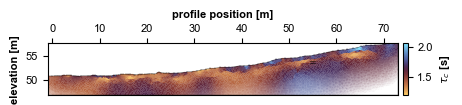

In [7]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

matplotlib.rc('font', **font)

#matplotlib.rc('text', usetex=True)
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

fig, ax = plt.subplots(figsize=(4.52756,3))
a = pg.show(mesh, data=ip.tau, coverage=cov, ax=ax, logScale=False, cMap=cm.managua, colorBar=False, showBoundary=False)
a[0].plot(mgr.data.sensors().array()[:,0], mgr.data.sensors().array()[:,2],'|k', markersize=1, markeredgewidth=0.2)
a[0].xaxis.tick_top()
a[0].set_ylabel('elevation [m]',weight='bold')
a[0].xaxis.set_label_position('top')
a[0].set_xlabel('profile position [m]',weight='bold')
b = mesh.boundaries(mesh.boundaryMarkers() != 0)
pg.viewer.mpl.drawSelectedMeshBoundaries(a[0], b,color=(0.0, 0.0, 0.0, 1.0),linewidth=0.2)

print(np.min(ip.tau))
print(np.max(ip.tau))


#a[0].plot(x,t1,'#888C8D',linewidth=0.4)
#a[0].plot(x,t2,'#888C8D',linewidth=0.4)
a[0].plot(x,t1,'k',linewidth=0.4)
a[0].plot(x,t2,'k',linewidth=0.4)

#### To do: Make surface line thin! 

mappable = a[0].collections[0]
fig = a[0].figure  
cbar_ax = fig.add_axes([0.91, 0.408, 0.01, 0.173])
#cbar = fig.colorbar(mappable, cax=cbar_ax, ticks=[10,30,100,300], format='%g', label='resistivity [$\Omega$m]')
cbar = fig.colorbar(mappable, cax=cbar_ax)
cbar.set_label(r"$\tau_c$ [s]",weight='bold')


cbar.ax.minorticks_off()



fig.savefig(name+'-tau.pdf',bbox_inches='tight')

0.5000139466866579
0.5063137025900216


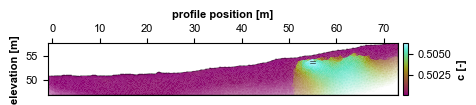

In [8]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

matplotlib.rc('font', **font)

#matplotlib.rc('text', usetex=True)
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

fig, ax = plt.subplots(figsize=(4.52756,3))
a = pg.show(mesh, data=ip.c, coverage=cov, ax=ax, logScale=False, cMap=cm.hawaii, colorBar=False, showBoundary=False)
a[0].plot(mgr.data.sensors().array()[:,0], mgr.data.sensors().array()[:,2],'|k', markersize=1, markeredgewidth=0.2)
a[0].xaxis.tick_top()
a[0].set_ylabel('elevation [m]',weight='bold')
a[0].xaxis.set_label_position('top')
a[0].set_xlabel('profile position [m]',weight='bold')
b = mesh.boundaries(mesh.boundaryMarkers() != 0)
pg.viewer.mpl.drawSelectedMeshBoundaries(a[0], b,color=(0.0, 0.0, 0.0, 1.0),linewidth=0.2)

print(np.min(ip.c))
print(np.max(ip.c))

#a[0].plot(x,t1,'#888C8D',linewidth=0.4)
#a[0].plot(x,t2,'#888C8D',linewidth=0.4)
a[0].plot(x,t1,'k',linewidth=0.4)
a[0].plot(x,t2,'k',linewidth=0.4)

#### To do: Make surface line thin! 

mappable = a[0].collections[0]
fig = a[0].figure  
cbar_ax = fig.add_axes([0.91, 0.408, 0.01, 0.173])
#cbar = fig.colorbar(mappable, cax=cbar_ax, ticks=[10,30,100,300], format='%g', label='resistivity [$\Omega$m]')
cbar = fig.colorbar(mappable, cax=cbar_ax)
cbar.set_label('c [-]',weight='bold')


cbar.ax.minorticks_off()



fig.savefig(name+'-c.pdf',bbox_inches='tight')